In [110]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
import numpy as np
import pandas as pd

In [112]:
train = pd.read_csv('/Users/yuvan/Downloads/house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [113]:
null_count=train.isnull().sum()
null_count[null_count>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [114]:
null_count[train.dtypes=='int64']

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [115]:
from sklearn.decomposition import PCA
PCA_columns = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GarageArea','PoolArea','GrLivArea','WoodDeckSF','OpenPorchSF','TotRmsAbvGrd','KitchenAbvGr','BsmtFullBath','BsmtHalfBath']
pca = PCA(n_components=3)
cols = pca.fit_transform(train[PCA_columns])
cols

array([[  74.63125702, -635.92162824, -140.51843347],
       [-140.33527859,  461.78008001,  -55.59434262],
       [ 197.6491876 , -604.19315254, -142.59127452],
       ...,
       [ 827.13721117, -759.99509838,  -14.1430607 ],
       [-466.29783654,  334.56668975,  -40.78635652],
       [-157.56635562,  451.5426481 ,  -34.9043075 ]])

In [116]:
X = pd.DataFrame(columns=['Sqfeet', 'Bedrooms', 'Bathrooms', 'c1', 'c2', 'c3'])
X['Sqfeet'] = train['LotArea']
X['Bedrooms'] = train['BedroomAbvGr']
X['Bathrooms'] = train['HalfBath'] + train['FullBath'] + train['BsmtHalfBath'] + train['BsmtFullBath']
X['c1'] = cols[:,0]
X['c2'] = cols[:,1]
X['c3'] = cols[:,2]
X

,Sqfeet,Bedrooms,Bathrooms,c1,c2,c3
0,8450,3,4,74.631257,-635.921628,-140.518433
1,9600,3,3,-140.335279,461.780080,-55.594343
2,11250,3,4,197.649188,-604.193153,-142.591275
3,9550,3,2,66.643455,-569.948180,0.905110
4,14260,4,4,791.475438,-633.508645,-165.078341
...,...,...,...,...,...,...
1455,7917,3,3,51.394968,-422.098081,-105.552027
1456,13175,3,3,911.455788,705.208596,420.777466
1457,9042,4,2,827.137211,-759.995098,-14.143061
1458,9717,2,2,-466.297837,334.566690,-40.786357


In [117]:
Y = train['SalePrice']
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [119]:
print("X_Train:", X_train.shape)
print("X_Value:", X_test.shape)
print("Y_Train:", Y_train.shape)
print("Y_Value:", Y_test.shape)

X_Train: (1168, 6)
X_Value: (292, 6)
Y_Train: (1168,)
Y_Value: (292,)


In [120]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [121]:
linear_model.score(X_test, Y_test)

0.5774354155017026

In [122]:
Y_prediction = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_prediction))
print(f"RMSE (Root Mean Squared Error): {rmse}")

RMSE (Root Mean Squared Error): 51100.747925540534


/var/folders/b_/2rm_wtzx7s98b3lbmqcmww7w0000gn/T/ipykernel_23329/1665160483.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


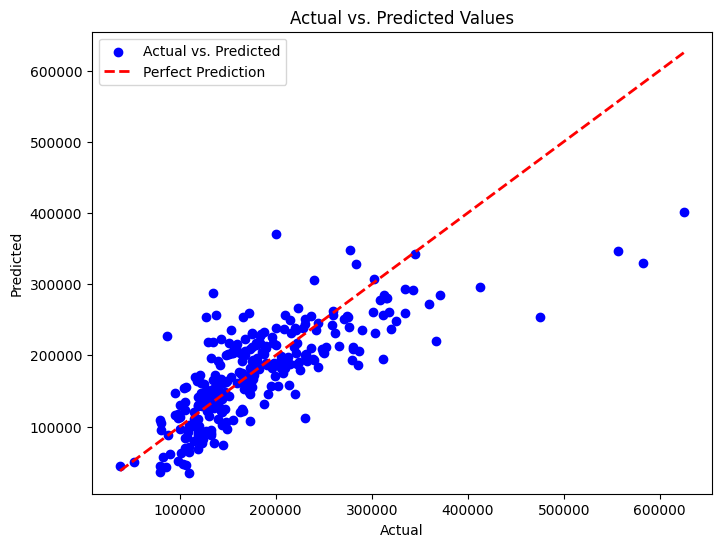

In [123]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_prediction, color='blue', label='Actual vs. Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
